# TP 5 & 6 Réseaux de neurones - Multi classification et Propagation en avant/arrière
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [2]:
# données
data = np.genfromtxt('data/neural_nets/data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

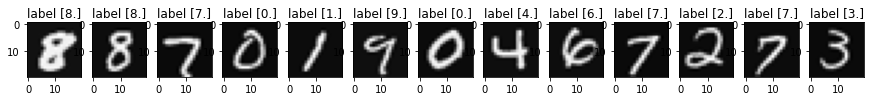

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nous paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre decaractéristiques (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.

In [6]:
def Sigmoid(z):
    return 1 / (1 + np.exp(-z));

In [7]:
def lrCostFunction (X, y, initial_theta, alpha, MaxIter,lambda_):
    # dans cette fonction vous devez appliquer la regression logistique avec tout ce que ceci implique
    # calcul du coût, minimisation du coût avec descente du gradient, et retour des paramètres theta pour une classe
    theta = np.array(initial_theta, copy=True)
    for i in range(MaxIter):
        y_hat = Sigmoid(X @ theta)
        error = y_hat - y
        theta_grad = np.expand_dims((X * error).mean(axis=0), axis=1)
        theta[0] = theta[0] - alpha * theta_grad[0]
        theta[1:] = theta[1:] * (1 - lambda_ * alpha / X.shape[0]) - alpha * theta_grad[1:]
    return theta.T


In [8]:
def predictOnveVsAll (all_theta, X):
    # ici en utilisant les paramètres calculés par la régression logisitique, 
    # nous aiemrions retourner les etiquettes predites
    
    # Ici chaque classifieur retournera de probabilité, il faudra choisir 
    # la probabilité maximale 
    # de tous les classifieurs d'une exemple donné
    # répeter pour tous les exmemples
    y_pred = np.argmax(Sigmoid(X @ all_theta.T), axis=1)
    
    return classes[y_pred[..., np.newaxis]]

In [9]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]));
all_theta.shape

(10, 401)

In [10]:
MaxIter= 10000
lambda_= 0.1
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1));
for i in range (number_classes):
     # appel pour chaque classifieur
     theta = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_);
     all_theta[i,:]=theta;               

KeyboardInterrupt: 

In [ ]:
y_pred = predictOnveVsAll(all_theta, X)

# Qualité du classifieur RL


In [ ]:
precision = np.mean(y==y_pred)*100
precision


# Partie 2: Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [40]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [41]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [38]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [ ]:
def predict (W1, W2, X):
    # appliquer une propagation en avant
    # !--- n'oubliez pas d'appliquer la sigmoid à chaque couche afin d'avoir les probabilités ---!
    
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    
    h1_output = Sigmoid(X @ W1.T)
    
    intercept = np.ones((X.shape[0],1))
    h2_input = np.column_stack((intercept, h1_output))
    
    h2_output = Sigmoid(h2_input @ W2.T)
    
    y_pred = np.argmax(h2_output, axis=1)[..., np.newaxis]
    
    # the neuron outputing probability for 0 class is at the end :( ...
    y_pred = y_pred + 1
    y_pred[y_pred==10] = 0
    return y_pred

In [78]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X)
precision = np.mean(y==y_pred)*100
precision

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [ ]:
model = LogisticRegression(penalty="l2", max_iter=10000)
model.fit(X[:, 1:], y.squeeze())
y_prob = model.predict_proba(X[:, 1:])
y_pred = np.argmax(y_prob, axis=1)[..., np.newaxis]

np.mean(y_pred==y)*100

# TP 6 Réseaux de neurones - Multi classification et Propagation en arrière

In [15]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [16]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Transformer y de tel sorte à avoir un vecteur pour chaque exemple

Equivalent de tocategorical

In [18]:
YY=np.zeros((y.shape[0], int(np.max(y))+1))
YY.shape

(5000, 10)

In [19]:
for i in range (YY.shape[0]):
    YY[i,int(y[i])]=1

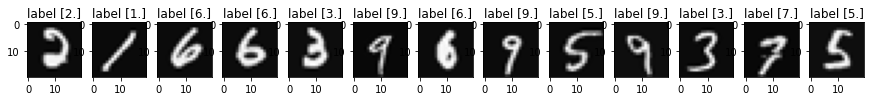

In [17]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [22]:
# poids de la couche 1
W1 = np.genfromtxt('data/neural_nets/W1.csv', delimiter=',', dtype=float)
W1.shape

(25, 401)

In [23]:
# poids de la couche 2
W2 = np.genfromtxt('data/neural_nets/W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [24]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

# TODO  1 calcul du coût
**Tâche 1**: Modifier la fonction computeCost afin d'obtenir un coût avec régularisation

Rappelons que le coût avec régularisation est calculé comme suit:

$ J(\theta)= \frac{1}{m} \sum_{i=1}^m\sum_{k=1}^K \left[ -y_k^{(i)} \log (h_\theta(x^{(i)}) )_k - (1-y_k^{(i)}) \log (1-h_\theta(x^{(i)}) )_k \right] + \frac{\lambda}{2m} \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} \left( \theta_{j,k}^{(1)} \right)^2 +   \sum_{j=1}^{10}\sum_{k=1}^{25} \left( \theta_{j,k}^{(2)} \right)^2 \right] $

In [25]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z));

In [26]:
def computeCost(X, YY, theta1, theta2, hidden_layer_size, lambda_):
    a1 = X

    z2 = np.zeros((X.shape[0], hidden_layer_size))
    a2 = np.zeros((X.shape[0], hidden_layer_size))

    intercept = np.ones((X.shape[0], 1))
    z2 = np.column_stack((intercept, np.matmul(a1, np.transpose(theta1))))
    a2 = Sigmoid(z2)
    a2[:, 0] = 1

    z3 = np.zeros((YY.shape[0], YY.shape[1]))
    a3 = np.zeros((YY.shape[0], YY.shape[1]))

    z3 = np.matmul(a2, np.transpose(theta2))
    a3 = Sigmoid(z3)

    J = np.zeros((YY.shape[0],1))
    J = (1 / y.shape[0]) * (np.sum(np.sum((-YY * np.log(a3)) - ((1 - YY) * np.log(1 - a3))))) + \
        (lambda_ / (2 * X.shape[0])) * (np.power(theta1[:, 1:], 2).sum() + np.power(theta2[:, 1:], 2).sum())

    return J

# TODO  2 calcul du gradient
**Tâche 2**: Implémenter la fonction NNCostFunction afin de retourner:

- Le coût avec régularisation
- Le gardient du coût par rapport à chaqu'un des paramètres du réseau

Rappelons le gradient de la sigmoid:

$ sigmoid(z) =\sigma(z)= \frac{1}{1-e^{-z}}$

$ \sigma(z)^\prime = \sigma(z)(1-\sigma(z)) =a(1-a)$ tel que $a$ est l'activation d'une couche donnée

L'algorithme à implementer est comme suit:

Pour chaque exemple de l'ensemble d'apprentissage faire

Pour chaque noeud de la couche de sortie, calculer la dérivée (gradient):

$\delta_k^{(3)} = \left( a_k^{(3)}- y_k \right)  $

Pour chaque noeud de la couche caché calculer la dérivée (gradient):

$\delta^{(2)} =  \left(\Theta^{(2)}\right)^T \delta^{(3)} \quad .* \quad \sigma^\prime\left(z^{(2)} \right) $

Notons que l'opérateur $.*$ represente la multiplication élement par élement et non pas la multiplication matricielle

Le gradient de chaque noeud et de chaque couche sera finalement:

$\Delta^{(l)} =  \Delta^{(l)} + \delta^{(l)} * \left( a^{(l)} \right)^T $

Fin pour

Fin pour

Diviser le gradient cumulé par le nombre d'exemples:

$ \frac{\partial J(\Theta)} { \partial \Theta_{i,j)}^{(l)}} = \frac{1}{m} \Delta_{i,j)}^{(l)}$


In [27]:
def NNCostFunction(X, YY, theta1, theta2, hidden_layer_size, lambda_ = 0):
    a1 = X # 5000x401
    z2 = X @ theta1.T # 5000x401 @ 401x25 = 5000x25
    a2 = np.column_stack((np.ones((z2.shape[0], 1)), Sigmoid(z2))) # 5000x26

    z3 = a2 @ theta2.T # 5000x26 @ 26x10 = 5000x10
    a3 = Sigmoid(z3) # 5000x10

    delta3 = a3 - YY # 5000x10

    delta2 = ((delta3 @ theta2) * a2 * (1 - a2))[:, 1:] # 5000x25 | il y a que 25 neurones, le dernier delta est celui du biais de la deuxième couche

    theta2_grad = (np.broadcast_to(delta3[:, :, np.newaxis], (*delta3.shape, a2.shape[1])) \
        * np.broadcast_to(a2[:, np.newaxis, :], (a2.shape[0], delta3.shape[1], a2.shape[1]))).mean(axis=0) \
        + (lambda_ / X.shape[0]) * np.column_stack((np.zeros((theta2.shape[0], 1)), theta2[:, 1:])) # 10x26

    theta1_grad = (np.broadcast_to(delta2[:, :, np.newaxis], (*delta2.shape, a1.shape[1])) \
        * np.broadcast_to(a1[:, np.newaxis, :], (a1.shape[0], delta2.shape[1], a1.shape[1]))).mean(axis=0) \
        + (lambda_ / X.shape[0]) * np.column_stack((np.zeros((theta1.shape[0], 1)), theta1[:, 1:])) # 25X401

    J = computeCost(X, YY, theta1, theta2, hidden_layer_size, lambda_)
    
    return J, [theta1_grad, theta2_grad]

# TODO  3 entrainement du réseau
**Tâche 3**: Entrainer le réseau en utilisant la descente du gradient:
Ici il faudra reprendre l'algorithme de la descente du gradient afin de mettre à jour les paramètres du réseau


In [28]:
def gradientDescent(X, y, theta, alpha, iterations, lambda_ = 0):
    losses, gradients = [], []
    for _ in range(iterations):
        loss, grad = NNCostFunction(X, y, theta[0], theta[1], hidden_layer_size, lambda_)
        
        theta[0] = theta[0] - alpha * grad[0]
        theta[1] = theta[1] - alpha * grad[1]
        
        losses.append(loss)
        gradients.append((grad[0].mean(), grad[1].mean()))
        
    return theta, np.asarray(losses), np.asarray(gradients)

In [29]:
def plot_cost_gradient(costs, gradients):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title("costs")
    plt.plot(range(costs.shape[0]), costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.subplot(1, 2, 2)
    plt.title("gradients")
    for i in range(gradients.shape[1]):
        plt.plot(range(gradients.shape[0]), gradients[:, i])
    plt.xlabel('iterations')
    plt.ylabel('gardient')

### Entrainement

In [30]:
iterations = 500
alpha = 1.5
theta = [np.random.normal(0, np.sqrt(1/212), W1.shape), np.random.normal(0, np.sqrt(1/17), W2.shape)]

theta, losses, gradients = gradientDescent(X, YY, theta, alpha, iterations)

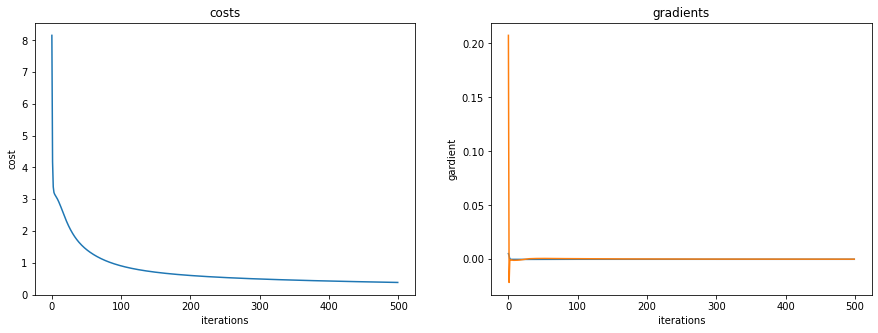

In [31]:
plot_cost_gradient(losses, gradients)

Comparaison avec les poids W1, W2

In [32]:
computeCost(X, YY, theta[0], theta[1], hidden_layer_size, 0)

0.3833866728504621

# TODO 4 : Régularisation
Mettre à jour le calcul du coût en ajoutant le terme de régularisation et comparer les résultats (avec et sans régularisation)

In [33]:
iterations = 500
alpha = 1.5
lambda_ = 500 
theta_reg = [np.random.normal(0, np.sqrt(1/212), W1.shape), np.random.normal(0, np.sqrt(1/17), W2.shape)]

theta_reg, losses_reg, gradients_reg = gradientDescent(X, YY, theta_reg, alpha, iterations, lambda_=1)

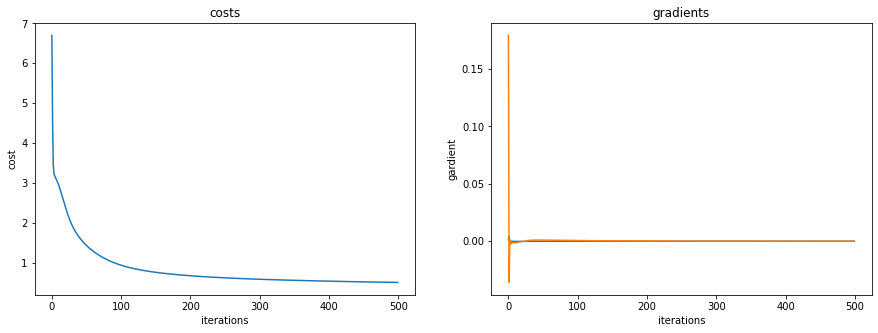

In [34]:
plot_cost_gradient(losses_reg, gradients_reg)

In [35]:
computeCost(X, YY, theta_reg[0], theta_reg[1], hidden_layer_size, 0)

0.4145177686443769

l'erreur est un peu plus élevée que celle sans régularisation. La précision est plus basse aussi.

# TODO 5 : Prédiction

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [36]:
def predict(W1, W2, X):
    
    # appliquer une propagation en avant
    # !--- n'oubliez pas d'appliquer la sigmoid à chaque couche afin d'avoir les probabilités ---!
    
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    h1_output = Sigmoid(X @ W1.T)
    
    intercept = np.ones((X.shape[0],1))
    h2_input = np.column_stack((intercept, h1_output))
    
    h2_output = Sigmoid(h2_input @ W2.T)
    
    y_pred = np.argmax(h2_output, axis=1)[..., np.newaxis]
    
    # the neuron outputing probability for 0 class is at the end :( ...
    #y_pred = (y_pred + 1) % 10
    
    return y_pred

La précision du modèle :

In [37]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred = predict(theta[0], theta[1], X)
precision = np.mean(y==y_pred)*100
precision

95.26

La précision du modèle avec régularisation (qui est plus bas que celui du modèle sans):

In [38]:
y_pred = predict(theta_reg[0], theta_reg[1], X)
precision = np.mean(y==y_pred)*100
precision

94.66

In [ ]:
y_pred = predict(theta_reg[0], theta_reg[1], X)
precision = np.mean(y==y_pred)*100
precision

94.69999999999999

# optionnel 1 : Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [40]:
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier

In [41]:
clf = MLPClassifier(solver='sgd', alpha=0.01, activation='logistic', max_iter=5000,
        hidden_layer_sizes=(25,), random_state=42)
clf.fit(X[:, 1:], YY)

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(25,),
              max_iter=5000, random_state=42, solver='sgd')

In [43]:
y_pred = np.argmax(clf.predict(X[:, 1:]), axis=1)[..., np.newaxis]
precision = np.mean(y==y_pred)*100
precision

90.06

In [44]:
clf.score(X[:, 1:], YY) * 100

89.22

# Optionnel 2 : Visualisation des poids
    
La visualisation de poids permet de voir quel partie du réseau est activé et pour quelle classe.
Il est possible de visulaiser les paramètres theta1 . 
Ceci peut se faire en utilisant un reshape de ces paramètres afin d'avoir 25 images de taille 20x20 (n'oubliez pas d'ignorer la premuère colonne, celle du biais)

In [45]:
def visualize_weights(w1, w2):
    plt.figure(figsize=(50, 20))
    for i in range(w1.shape[0]):
        plt.subplot(3, 13, i + 1)
        plt.imshow(np.reshape(w1[i][1:], (20, 20)))
    for i in range(w2.shape[0]):
        plt.subplot(3, 13, w1.shape[0] + i + 2)
        plt.imshow(np.reshape(w2[i][1:], (-1, 1)))

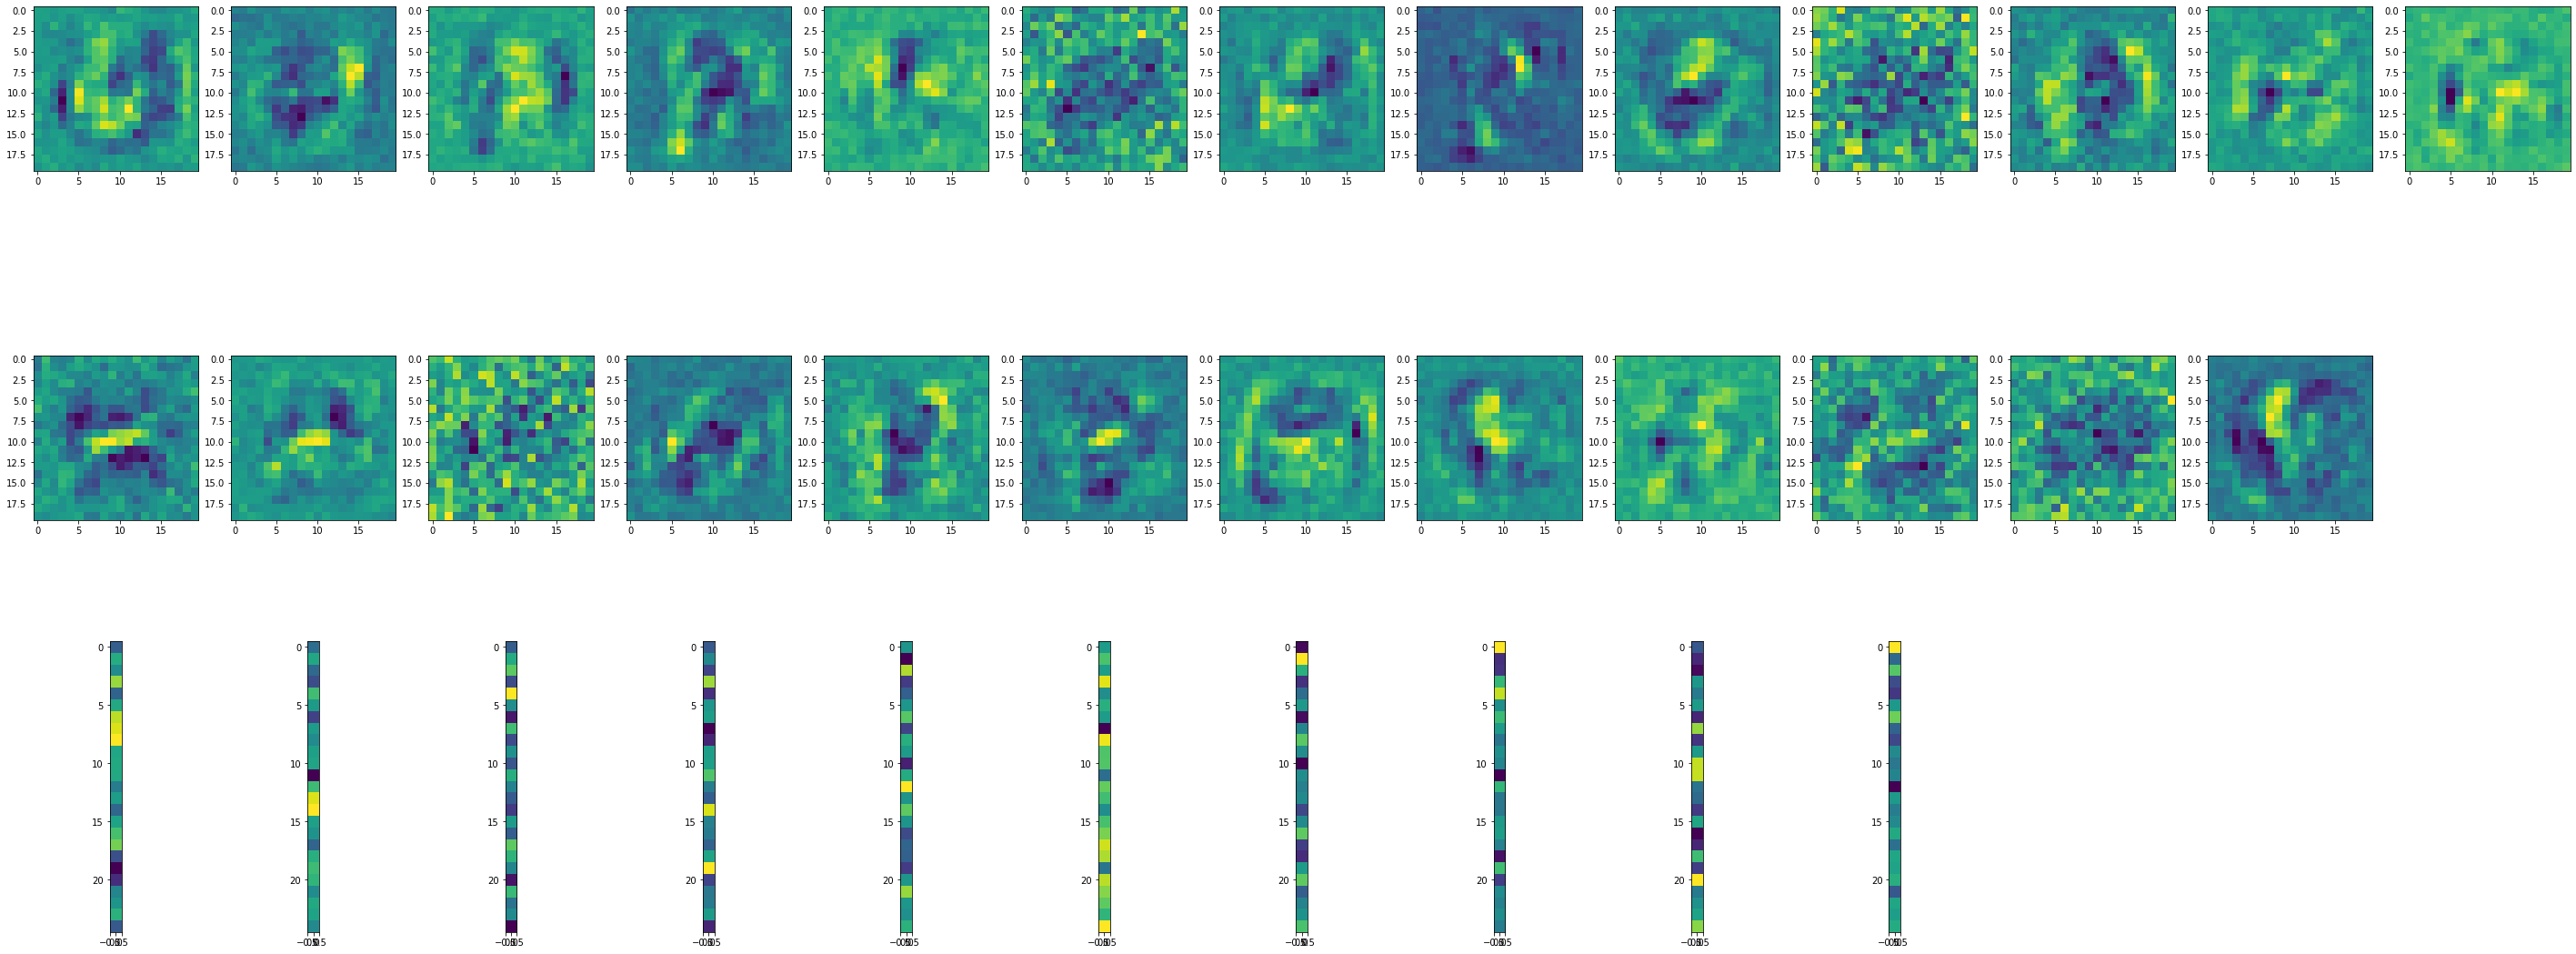

In [48]:
visualize_weights(theta[0], theta[1])